**Завдання**
### Використовуючи з лекції датасет і код:
* створити на основі двошарової нейромережі тришарову;
* оцінити її похибку та точність визначення класів.

In [113]:
# Required libraries.
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

%matplotlib inline

### Loading a dataset and splitting it into a train and test data:

In [114]:
# Converts the image into numbers.
Transform = transforms.ToTensor()

# Downloading dataset and making a train data.
train_data = datasets.MNIST(root='E:\Python DEVELOPER\StartUpAcademy\projects\lesson_54\DATA',
                             train=False, download=False, transform=Transform)

train_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: E:\Python DEVELOPER\StartUpAcademy\projects\lesson_54\DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

In [115]:
# Making a test data.
test_data = datasets.MNIST(root='E:\Python DEVELOPER\StartUpAcademy\projects\lesson_54\DATA', train=False, download=False, transform=Transform)

test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: E:\Python DEVELOPER\StartUpAcademy\projects\lesson_54\DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

### Making models of architecture for neural network:

In [116]:
# Model's parameters.
input_layer = 784
hidden_layers = [120, 84]
output_layer = 10

In [117]:
# Making a class for neural network.
class Classification(nn.Module):
    # Layers initialisation.
    def __init__(self):
        super().__init__() # успадковуємо всі властивості + додаємо своє.
        self.input_layer = nn.Linear(input_layer, hidden_layers[0]) # input layer.
        self.hid_layer1 = nn.Linear(hidden_layers[0], hidden_layers[1]) # hidden layer 1.
        self.hid_layer2 = nn.Linear(hidden_layers[1], hidden_layers[1]) # hidden layer 2
        self.output_layer = nn.Linear(hidden_layers[1], output_layer) # output layer.

    # Path of moving data through the neural network.
    def forward(self, x):
        out = F.relu(self.input_layer(x))  # input layer with a relu activation.
        out = F.relu(self.hid_layer1(out)) # hidden layer 1 with a relu activation.
        out = F.relu(self.hid_layer2(out)) # layer 2 with relu activation.
        out = self.output_layer(out) # output layer.
        return F.log_softmax(out, dim=1) # activation with softmax.

# Making an object for the neural network.
model = Classification()
model

Classification(
  (input_layer): Linear(in_features=784, out_features=120, bias=True)
  (hid_layer1): Linear(in_features=120, out_features=84, bias=True)
  (hid_layer2): Linear(in_features=84, out_features=84, bias=True)
  (output_layer): Linear(in_features=84, out_features=10, bias=True)
)

### Loading data into batches:

In [118]:
train_load = DataLoader(train_data, batch_size=100, shuffle=True)
test_load = DataLoader(test_data, batch_size=500, shuffle=False)

### The error function and optimizer:

In [119]:
# Initialisation the error function.
criterion = nn.CrossEntropyLoss()
# Initialization the Adam optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train the Neural Network:

In [120]:
for images, labels in train_load:
    print('BEFORE [Initial data shape]:', images.size())
    break
print('AFTER [Data after reshaping]:', images.view(100, -1).size())

BEFORE [Initial data shape]: torch.Size([100, 1, 28, 28])
AFTER [Data after reshaping]: torch.Size([100, 784])


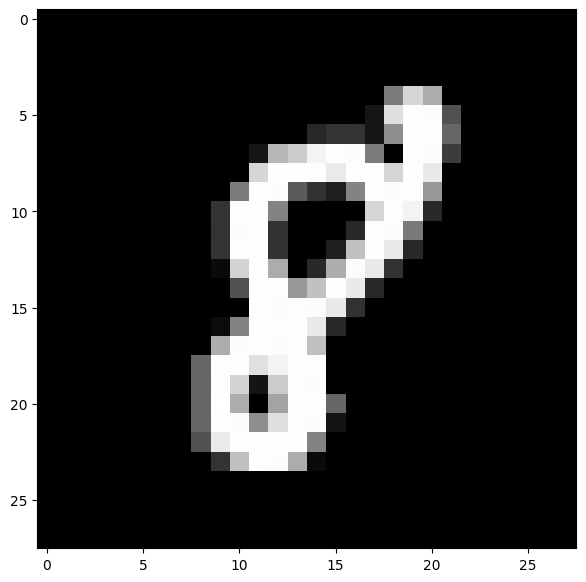

In [121]:
# Visualisation a random figure.
plt.figure(figsize=(14,7))
plt.imshow(images[1, 0], cmap='gray')
plt.show()

In [122]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches.
    for b, (X_train, y_train) in enumerate(train_load):
        b += 1

        # Applying the model.
        y_pred = model(X_train.view(100, -1)) # Flatten X_train.
        loss = criterion(y_pred, y_train)

        # Computing the number of correct predictions.
        predicted = torch.max(y_pred.data, 1)[1] # the prediction with the maximum probability.
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        # Update parameters.
        optimizer.zero_grad() # reset the gradients after each training step.
        loss.backward() # to trigger  backprop.
        optimizer.step() # perform parameter update.

      # Printing the model error and accuracy.
    print('Epoch: [%d/%d], Error: %.4f,' % (epoch+1, epochs, loss), 'Train accuracy: %.4f' % (train_corr.item()))


# Updating train loss and accuracy for the epoch.
train_losses.append(loss)
train_correct.append(train_correct)

# Run the testing batches.
with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_load):
        # Applying the model.
        y_val = model(X_test.view(500, -1)) # Flatten X_test.

        # Computing the number of correct predictions.
        predicted = torch.max(y_val.data, 1)[1]
        test_corr += (predicted == y_test).sum()

Epoch: [1/10], Error: 0.3937, Train accuracy: 7230.0000
Epoch: [2/10], Error: 0.2965, Train accuracy: 8994.0000
Epoch: [3/10], Error: 0.1977, Train accuracy: 9189.0000
Epoch: [4/10], Error: 0.1906, Train accuracy: 9349.0000
Epoch: [5/10], Error: 0.1160, Train accuracy: 9500.0000
Epoch: [6/10], Error: 0.1181, Train accuracy: 9591.0000
Epoch: [7/10], Error: 0.1208, Train accuracy: 9680.0000
Epoch: [8/10], Error: 0.0869, Train accuracy: 9714.0000
Epoch: [9/10], Error: 0.1082, Train accuracy: 9788.0000
Epoch: [10/10], Error: 0.0223, Train accuracy: 9795.0000


In [123]:
# Updating train loss and accuracy for the epoch.
loss = criterion(y_val, y_test)
test_losses.append(loss)
test_correct.append(test_corr)

In [124]:
# Test accuracy for the last epoch.
print(f'Test accuracy: {test_correct[-1].item() * 100/10000:.3f} %')

Test accuracy: 98.380 %


In [125]:
# Saving and loading all model.
torch.save(model, 'model.pkl')
model = torch.load('model.pkl')

In [126]:
# Saving only parameters of model.
torch.save(model.state_dict(), 'params.pkl')
model.load_state_dict(torch.load('params.pkl'))

<All keys matched successfully>